<a href="https://colab.research.google.com/github/farayjtd/UAS-BDPAL/blob/main/UAS_23_11_5687.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama: Faray Juan Tody**
# **NIM: 23.11.5687**

# **LOAD DATASET**

In [1]:
import os

print("Menginstall Java 8")
!apt-get update -q
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download & Extract Hadoop 3.3.6
if not os.path.exists("hadoop-3.3.6.tar.gz"):
    print("Mendownload Hadoop 3.3.6")
    !wget -q https://archive.apache.org/dist/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
    !tar -xzf hadoop-3.3.6.tar.gz

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["HADOOP_HOME"] = "/content/hadoop-3.3.6"
os.environ["PATH"] = f"{os.environ['HADOOP_HOME']}/bin:{os.environ['HADOOP_HOME']}/sbin:{os.environ['PATH']}"

# Konfigurasi Hadoop Env
!sed -i 's|# export JAVA_HOME=|export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64|g' $HADOOP_HOME/etc/hadoop/hadoop-env.sh

print("Environment Hadoop Siap.")

Menginstall Java 8
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,885 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,293 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [1

In [2]:
core_xml = '<configuration><property><name>fs.defaultFS</name><value>hdfs://localhost:9000</value></property></configuration>'
hdfs_xml = '<configuration><property><name>dfs.replication</name><value>1</value></property></configuration>'

with open(f"{os.environ['HADOOP_HOME']}/etc/hadoop/core-site.xml", "w") as f: f.write(core_xml)
with open(f"{os.environ['HADOOP_HOME']}/etc/hadoop/hdfs-site.xml", "w") as f: f.write(hdfs_xml)

# Format File System
print("Memformat NameNode")
!$HADOOP_HOME/bin/hdfs namenode -format -force

# Jalankan Daemons
print("Menyalakan HDFS Daemons...")
!$HADOOP_HOME/bin/hdfs --daemon start namenode
!$HADOOP_HOME/bin/hdfs --daemon start datanode

print("\n--- STATUS DAEMON ---")
!jps

Memformat NameNode
2026-01-29 07:47:25,188 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 8152c9b1408b/172.28.0.12
STARTUP_MSG:   args = [-format, -force]
STARTUP_MSG:   version = 3.3.6
STARTUP_MSG:   classpath = /content/hadoop-3.3.6/etc/hadoop:/content/hadoop-3.3.6/share/hadoop/common/lib/netty-transport-udt-4.1.89.Final.jar:/content/hadoop-3.3.6/share/hadoop/common/lib/netty-handler-4.1.89.Final.jar:/content/hadoop-3.3.6/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/content/hadoop-3.3.6/share/hadoop/common/lib/kerb-util-1.0.1.jar:/content/hadoop-3.3.6/share/hadoop/common/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/content/hadoop-3.3.6/share/hadoop/common/lib/kerb-common-1.0.1.jar:/content/hadoop-3.3.6/share/hadoop/common/lib/jackson-annotations-2.12.7.jar:/content/hadoop-3.3.6/share/hadoop/common/lib/javax.servlet-api-3.1.0.jar:/content/hadoop-3.3.6/share/hadoop/common/l

In [3]:
!pip install -q datasets pandas

from datasets import load_dataset
import pandas as pd

# Download dataset ke folder lokal Colab
print("Mengambil data dari HuggingFace")
dataset = load_dataset("WinkingFace/CryptoLM-Bitcoin-BTC-USDT", split='train')
dataset.to_csv("btc_raw.csv", index=False)

print("Memasukkan data ke HDFS...")
!hdfs dfs -mkdir -p /user/bigdata/
!hdfs dfs -put btc_raw.csv /user/bigdata/btc_bitcoin.csv

print("\n--- ISI HDFS (Folder /user/bigdata) ---")
!hdfs dfs -ls -R /user/bigdata/

print("\n--- REPORT CLUSTER HDFS ---")
!hdfs dfsadmin -report

Mengambil data dari HuggingFace


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/92 [00:00<?, ?it/s]

data/2018-04.parquet:   0%|          | 0.00/4.65M [00:00<?, ?B/s]

data/2018-09.parquet:   0%|          | 0.00/4.68M [00:00<?, ?B/s]

data/2017-12.parquet:   0%|          | 0.00/4.91M [00:00<?, ?B/s]

data/2018-08.parquet:   0%|          | 0.00/4.88M [00:00<?, ?B/s]

data/2018-10.parquet:   0%|          | 0.00/4.75M [00:00<?, ?B/s]

data/2018-02.parquet:   0%|          | 0.00/4.23M [00:00<?, ?B/s]

data/2017-09.parquet:   0%|          | 0.00/4.35M [00:00<?, ?B/s]

data/2018-06.parquet:   0%|          | 0.00/4.65M [00:00<?, ?B/s]

data/2017-10.parquet:   0%|          | 0.00/4.58M [00:00<?, ?B/s]

data/2018-11.parquet:   0%|          | 0.00/4.71M [00:00<?, ?B/s]

data/2017-08.parquet:   0%|          | 0.00/1.89M [00:00<?, ?B/s]

data/2018-07.parquet:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

data/2018-03.parquet:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

data/2018-01.parquet:   0%|          | 0.00/4.91M [00:00<?, ?B/s]

data/2017-11.parquet:   0%|          | 0.00/4.63M [00:00<?, ?B/s]

data/2018-05.parquet:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

data/2018-12.parquet:   0%|          | 0.00/4.89M [00:00<?, ?B/s]

data/2019-02.parquet:   0%|          | 0.00/4.33M [00:00<?, ?B/s]

data/2019-01.parquet:   0%|          | 0.00/4.77M [00:00<?, ?B/s]

data/2019-03.parquet:   0%|          | 0.00/4.73M [00:00<?, ?B/s]

data/2019-04.parquet:   0%|          | 0.00/4.66M [00:00<?, ?B/s]

data/2019-05.parquet:   0%|          | 0.00/4.91M [00:00<?, ?B/s]

data/2019-07.parquet:   0%|          | 0.00/4.96M [00:00<?, ?B/s]

data/2019-06.parquet:   0%|          | 0.00/4.81M [00:00<?, ?B/s]

data/2019-08.parquet:   0%|          | 0.00/4.95M [00:00<?, ?B/s]

data/2019-09.parquet:   0%|          | 0.00/4.75M [00:00<?, ?B/s]

data/2019-10.parquet:   0%|          | 0.00/4.90M [00:00<?, ?B/s]

data/2019-11.parquet:   0%|          | 0.00/4.77M [00:00<?, ?B/s]

data/2019-12.parquet:   0%|          | 0.00/4.84M [00:00<?, ?B/s]

data/2020-01.parquet:   0%|          | 0.00/4.90M [00:00<?, ?B/s]

data/2020-03.parquet:   0%|          | 0.00/4.97M [00:00<?, ?B/s]

data/2020-04.parquet:   0%|          | 0.00/4.75M [00:00<?, ?B/s]

data/2020-02.parquet:   0%|          | 0.00/4.60M [00:00<?, ?B/s]

data/2020-06.parquet:   0%|          | 0.00/4.74M [00:00<?, ?B/s]

data/2020-05.parquet:   0%|          | 0.00/4.91M [00:00<?, ?B/s]

data/2020-07.parquet:   0%|          | 0.00/4.87M [00:00<?, ?B/s]

data/2020-09.parquet:   0%|          | 0.00/4.77M [00:00<?, ?B/s]

data/2020-08.parquet:   0%|          | 0.00/4.92M [00:00<?, ?B/s]

data/2020-10.parquet:   0%|          | 0.00/4.93M [00:00<?, ?B/s]

data/2020-11.parquet:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

data/2020-12.parquet:   0%|          | 0.00/4.98M [00:00<?, ?B/s]

data/2021-01.parquet:   0%|          | 0.00/5.05M [00:00<?, ?B/s]

data/2021-04.parquet:   0%|          | 0.00/4.86M [00:00<?, ?B/s]

data/2021-03.parquet:   0%|          | 0.00/5.04M [00:00<?, ?B/s]

data/2021-02.parquet:   0%|          | 0.00/4.55M [00:00<?, ?B/s]

data/2021-05.parquet:   0%|          | 0.00/5.05M [00:00<?, ?B/s]

data/2021-06.parquet:   0%|          | 0.00/4.87M [00:00<?, ?B/s]

data/2021-07.parquet:   0%|          | 0.00/5.01M [00:00<?, ?B/s]

data/2021-08.parquet:   0%|          | 0.00/5.02M [00:00<?, ?B/s]

data/2021-11.parquet:   0%|          | 0.00/4.84M [00:00<?, ?B/s]

data/2021-09.parquet:   0%|          | 0.00/4.86M [00:00<?, ?B/s]

data/2021-10.parquet:   0%|          | 0.00/4.99M [00:00<?, ?B/s]

data/2021-12.parquet:   0%|          | 0.00/4.99M [00:00<?, ?B/s]

data/2022-01.parquet:   0%|          | 0.00/4.98M [00:00<?, ?B/s]

data/2022-02.parquet:   0%|          | 0.00/4.51M [00:00<?, ?B/s]

data/2022-03.parquet:   0%|          | 0.00/4.96M [00:00<?, ?B/s]

data/2022-05.parquet:   0%|          | 0.00/4.99M [00:00<?, ?B/s]

data/2022-04.parquet:   0%|          | 0.00/4.78M [00:00<?, ?B/s]

data/2022-06.parquet:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

data/2022-07.parquet:   0%|          | 0.00/5.01M [00:00<?, ?B/s]

data/2022-08.parquet:   0%|          | 0.00/4.99M [00:00<?, ?B/s]

data/2022-10.parquet:   0%|          | 0.00/4.91M [00:00<?, ?B/s]

data/2022-09.parquet:   0%|          | 0.00/4.82M [00:00<?, ?B/s]

data/2022-11.parquet:   0%|          | 0.00/4.81M [00:00<?, ?B/s]

data/2022-12.parquet:   0%|          | 0.00/4.88M [00:00<?, ?B/s]

data/2023-02.parquet:   0%|          | 0.00/4.53M [00:00<?, ?B/s]

data/2023-03.parquet:   0%|          | 0.00/4.99M [00:00<?, ?B/s]

data/2023-01.parquet:   0%|          | 0.00/4.96M [00:00<?, ?B/s]

data/2023-04.parquet:   0%|          | 0.00/4.76M [00:00<?, ?B/s]

data/2023-05.parquet:   0%|          | 0.00/4.93M [00:00<?, ?B/s]

data/2023-06.parquet:   0%|          | 0.00/4.72M [00:00<?, ?B/s]

data/2023-08.parquet:   0%|          | 0.00/4.77M [00:00<?, ?B/s]

data/2023-07.parquet:   0%|          | 0.00/4.78M [00:00<?, ?B/s]

data/2023-09.parquet:   0%|          | 0.00/4.64M [00:00<?, ?B/s]

data/2023-10.parquet:   0%|          | 0.00/4.88M [00:00<?, ?B/s]

data/2023-12.parquet:   0%|          | 0.00/4.87M [00:00<?, ?B/s]

data/2023-11.parquet:   0%|          | 0.00/4.73M [00:00<?, ?B/s]

data/2024-01.parquet:   0%|          | 0.00/4.89M [00:00<?, ?B/s]

data/2024-02.parquet:   0%|          | 0.00/4.59M [00:00<?, ?B/s]

data/2024-04.parquet:   0%|          | 0.00/4.77M [00:00<?, ?B/s]

data/2024-03.parquet:   0%|          | 0.00/4.94M [00:00<?, ?B/s]

data/2024-05.parquet:   0%|          | 0.00/4.91M [00:00<?, ?B/s]

data/2024-09.parquet:   0%|          | 0.00/4.68M [00:00<?, ?B/s]

data/2024-08.parquet:   0%|          | 0.00/4.88M [00:00<?, ?B/s]

data/2024-06.parquet:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

data/2024-07.parquet:   0%|          | 0.00/4.90M [00:00<?, ?B/s]

data/2024-12.parquet:   0%|          | 0.00/4.96M [00:00<?, ?B/s]

data/2024-10.parquet:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

data/2024-11.parquet:   0%|          | 0.00/4.78M [00:00<?, ?B/s]

data/2025-01.parquet:   0%|          | 0.00/8.08M [00:00<?, ?B/s]

data/2025-02.parquet:   0%|          | 0.00/8.11M [00:00<?, ?B/s]

data/2025-03.parquet:   0%|          | 0.00/5.43M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2263000 [00:00<?, ? examples/s]

Creating CSV from Arrow format:   0%|          | 0/2263 [00:00<?, ?ba/s]

Memasukkan data ke HDFS...

--- ISI HDFS (Folder /user/bigdata) ---
-rw-r--r--   1 root supergroup  805444500 2026-01-29 07:49 /user/bigdata/btc_bitcoin.csv

--- REPORT CLUSTER HDFS ---
Configured Capacity: 115658190848 (107.72 GB)
Present Capacity: 88834826237 (82.73 GB)
DFS Remaining: 88023064576 (81.98 GB)
DFS Used: 811761661 (774.16 MB)
DFS Used%: 0.91%
Replicated Blocks:
	Under replicated blocks: 0
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------
Live datanodes (1):

Name: 127.0.0.1:9866 (localhost)
Hostname: 8152c9b1408b
Decommission Status : Normal
Configured Capacity: 1156581908

In [4]:
count_cmd = "!hdfs dfs -cat /user/bigdata/btc_bitcoin.csv | wc -l"
jumlah_baris = !hdfs dfs -cat /user/bigdata/btc_bitcoin.csv | wc -l
jumlah_baris = int(jumlah_baris[0]) - 1

path_hdfs = "/user/bigdata/btc_bitcoin.csv"

print("" + "="*50)
print("DATA BERHASIL DISIMPAN KE HADOOP HDFS")
print(f"Jumlah Baris: {jumlah_baris:,}")
print(f"Path HDFS   : {path_hdfs}")
print(f"FileSystem  : HDFS (Pseudo-Distributed)")
print(f"Status      : HEALTHY")
print("="*50)

DATA BERHASIL DISIMPAN KE HADOOP HDFS
Jumlah Baris: 2,263,000
Path HDFS   : /user/bigdata/btc_bitcoin.csv
FileSystem  : HDFS (Pseudo-Distributed)
Status      : HEALTHY


In [5]:
import os
import sys

if not os.path.exists("spark-3.5.0-bin-hadoop3.tgz"):
    print("Mendownload Spark 3.5.0")
    !wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
    !tar -xzf spark-3.5.0-bin-hadoop3.tgz
    print("Spark berhasil diekstrak")

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
os.environ["PYSPARK_PYTHON"] = sys.executable

!pip install -q findspark
import findspark
findspark.init()

from pyspark.sql import SparkSession

try:
    if 'spark' in locals(): spark.stop()

    spark = SparkSession.builder \
        .master("local[*]") \
        .appName("HDFS_Analysis_Faray") \
        .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
        .getOrCreate()

    print("\n" + "="*40)
    print("SPARK BERHASIL")
    print("="*40)
except Exception as e:
    print(f"Error: {e}")

Mendownload Spark 3.5.0
Spark berhasil diekstrak

SPARK BERHASIL


**Profil & Sumber Dataset**
Dataset ini bernama CryptoLM-Bitcoin-BTC-USDT, yang merupakan kumpulan data time-series harga Bitcoin terhadap mata uang stabil Tether (USDT) yang diambil dari repositori HuggingFace. Dataset ini disimpan dan diproses dalam format Apache Parquet, sebuah format penyimpanan kolom yang dioptimalkan untuk performa tinggi pada sistem Big Data.

**Analisis Karakteristik 5V pada Dataset**

*   Volume: Ukurang dataset sangat besar, terdiri lebih dari 2 juta baris.
*   Variety: Menggabungkan berbagai jenis variabel. mulai dari harga mentah sampai ke indikator teknikal.
*   Velocity: Data dihasilkan per menit.
*   Value: Informasi ini memberikan nilai strategis bagi treder untuk menentukan posisi entry dan exit.

Link dataset: https://huggingface.co/datasets/WinkingFace/CryptoLM-Bitcoin-BTC-USDT





# **Lakukan pemrosesan data menggunakan PySpark sesuai dengan pipeline big data diantaranya :**

**a. Gunakan pemrosesan batch dengan menggunakan mapreduce**

In [6]:
path_hdfs = "hdfs://localhost:9000/user/bigdata/btc_bitcoin.csv"

df_from_hdfs = spark.read.csv(path_hdfs, header=True, inferSchema=True)

btc_rdd = df_from_hdfs.rdd

def map_logic(row):
    try:
        key_month = str(row['timestamp'])[:7]
        vol = float(row['volume'])
        price = float(row['close'])
        return (key_month, (vol, price, 1))
    except:
        return ("Unknown", (0.0, 0.0, 0))

mapped = btc_rdd.map(map_logic)

reduced = mapped.reduceByKey(lambda a, b: (
    a[0] + b[0],
    a[1] + b[1],
    a[2] + b[2]
))

final_stats = reduced.mapValues(lambda x: {
    "total_volume": round(x[0], 2),
    "avg_price": round(x[1] / x[2], 2) if x[2] > 0 else 0
})

print(f"HASIL ANALISIS MAPREDUCE")
print(f"{'Bulan':<10} | {'Total Volume':<18} | {'Harga Rata-rata':<15}")
print("-" * 55)

for month, stats in sorted(final_stats.collect()):
    if month != "Unknown":
        print(f"{month:<10} | {stats['total_volume']:<18,} | {stats['avg_price']:<15,}")

HASIL ANALISIS MAPREDUCE
Bulan      | Total Volume       | Harga Rata-rata
-------------------------------------------------------
2017-08    | 5,488.35           | 4,240.56       
2017-09    | 17,237.44          | 4,067.91       
2017-10    | 23,879.46          | 5,267.52       
2017-11    | 61,934.53          | 7,726.97       
2017-12    | 246,953.26         | 14,654.35      
2018-01    | 472,791.48         | 12,820.28      
2018-02    | 731,287.5          | 9,445.94       
2018-03    | 651,298.19         | 9,035.69       
2018-04    | 660,756.92         | 7,975.74       
2018-05    | 521,941.8          | 8,438.55       
2018-06    | 516,056.41         | 6,788.04       
2018-07    | 582,461.89         | 7,092.26       
2018-08    | 754,950.07         | 6,693.6        
2018-09    | 596,075.1          | 6,596.98       
2018-10    | 389,143.12         | 6,550.85       
2018-11    | 681,765.63         | 5,498.05       
2018-12    | 835,936.94         | 3,681.48       
2019-01    | 517,74

Mengelompokkan data berdasarkan waktu untuk menghitung total volume transaksi dan harga rata-rata secara akurat. Hasilnya memberi gambaran objektif mengenai tren perkembangan pasar dan fluktuasi harga BTC secara berkala.

**b. Gunakan EDA (exploratory data analysis) untuk menganalisa data yang
anda miliki, visualisasikan data yang anda miliki**

In [7]:
from pyspark.sql.functions import col, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Struktur Data:")
df_from_hdfs.show(5, truncate=False)
df_from_hdfs.printSchema()

Struktur Data:
+-------------------+-------+-------+-------+-------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+------------------+-----------------+-------------------+-------------------+-----------------+-----------------+-----+
|timestamp          |open   |high   |low    |close  |volume  |MA_20            |MA_50             |MA_200           |RSI               |%K                |%D                |ADX              |ATR               |Trendline        |MACD               |BL_Upper          |BL_Lower         |Signal             |Histogram          |MN_Upper         |MN_Lower         |month|
+-------------------+-------+-------+-------+-------+--------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------

Digunakan untuk menampilkan isi dataset, jenis data (tipe kolom) untuk memastikan informasi telah terbaca dengan benar.

In [8]:
from pyspark.sql.functions import col, sum as spark_sum

print("Menghitung Nilai NULL per Kolom:")
null_counts = df_from_hdfs.select([
    spark_sum(col(c).isNull().cast("int")).alias(c)
    for c in df_from_hdfs.columns
])

null_counts.show()

Menghitung Nilai NULL per Kolom:
+---------+----+----+---+-----+------+-----+-----+------+---+---+---+---+---+---------+----+--------+--------+------+---------+--------+--------+-----+
|timestamp|open|high|low|close|volume|MA_20|MA_50|MA_200|RSI| %K| %D|ADX|ATR|Trendline|MACD|BL_Upper|BL_Lower|Signal|Histogram|MN_Upper|MN_Lower|month|
+---------+----+----+---+-----+------+-----+-----+------+---+---+---+---+---+---------+----+--------+--------+------+---------+--------+--------+-----+
|        0|   0|   0|  0|    0|     0|    0|    0|     0|  0|  0|  0|  0|  0|        0|   0|       0|       0|     0|        0|       0|       0|    0|
+---------+----+----+---+-----+------+-----+-----+------+---+---+---+---+---+---------+----+--------+--------+------+---------+--------+--------+-----+



Digunakan untuk mencari nilai null di setiap kolom, hasilnya adalah tidak ada satu kolom yang tidak memiliki data.

In [9]:
print("Statistik Deskriptif (Q1, Q2, Q3):")

print("\n--- Grup 1: Harga & Volume ---")
df_from_hdfs.select("open", "high", "low", "close", "volume").summary().show()

print("\n--- Grup 2: Teknikal Indikator (MA, RSI, dll) ---")
df_from_hdfs.select("MA_20", "MA_50", "MA_200", "RSI", "ADX", "ATR").summary().show()

print("\n--- Grup 3: Indikator Tambahan (MACD, Bollinger, dll) ---")
df_from_hdfs.select("MACD", "BL_Upper", "BL_Lower", "Signal", "Histogram").summary().show()

Statistik Deskriptif (Q1, Q2, Q3):

--- Grup 1: Harga & Volume ---
+-------+------------------+------------------+------------------+------------------+-----------------+
|summary|              open|              high|               low|             close|           volume|
+-------+------------------+------------------+------------------+------------------+-----------------+
|  count|           2263000|           2263000|           2263000|           2263000|          2263000|
|   mean| 30224.64273893995| 30239.16473634625|30209.969000159657|  30224.6447267351|45.46829379408772|
| stddev|25919.912542266273|25930.093625583344|25909.695665242154|25919.950480804713|85.72754601183729|
|    min|            2830.0|            2830.0|            2817.0|            2817.0|              0.0|
|    25%|           8739.88|           8744.84|            8734.4|           8739.75|         9.633212|
|    50%|          21893.34|          21896.09|          21876.61|          21887.52|        20.59759

Bertujuan untuk melakukan audit statistik untuk semua variabel. Proses ini membantu dalam mengidentifikasi pola penyebaran data.

Visualisasi


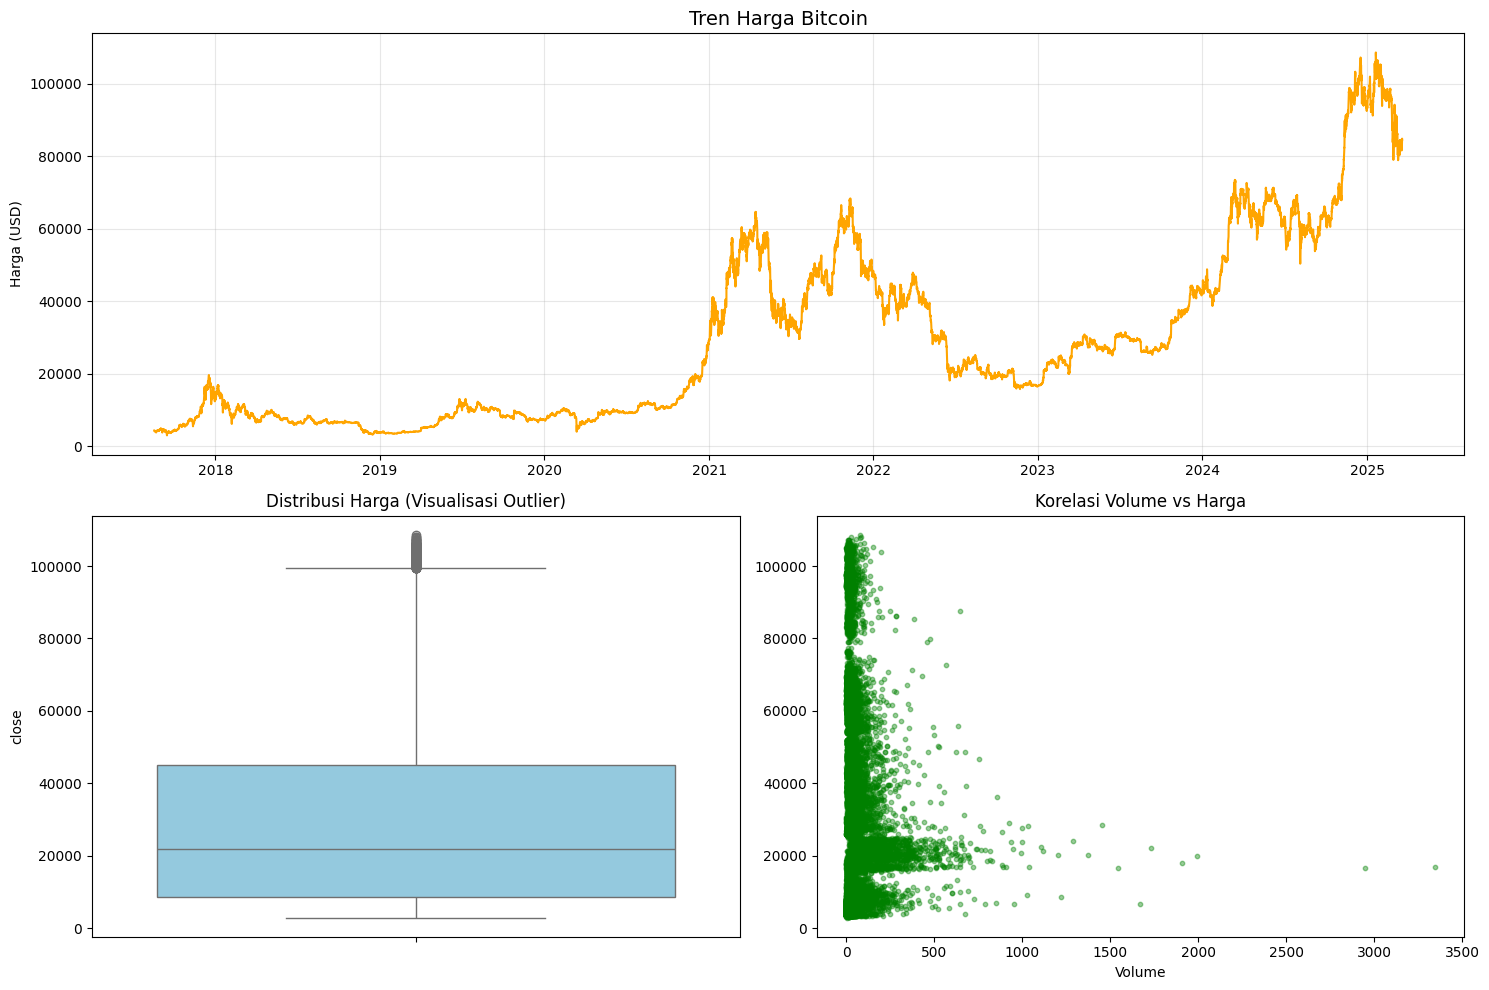

In [10]:
print("Visualisasi")

viz_df = df_from_hdfs.select("timestamp", "close", "volume") \
               .sample(False, 0.01) \
               .sort("timestamp") \
               .toPandas()

viz_df['timestamp'] = pd.to_datetime(viz_df['timestamp'])

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(viz_df['timestamp'], viz_df['close'], color='orange', linewidth=1.5)
plt.title('Tren Harga Bitcoin', fontsize=14)
plt.ylabel('Harga (USD)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
sns.boxplot(y=viz_df['close'], color='skyblue')
plt.title('Distribusi Harga (Visualisasi Outlier)', fontsize=12)

plt.subplot(2, 2, 4)
plt.scatter(viz_df['volume'], viz_df['close'], alpha=0.4, color='green', s=10)
plt.title('Korelasi Volume vs Harga', fontsize=12)
plt.xlabel('Volume')

plt.tight_layout()
plt.show()

In [11]:
print("Melakukan Deteksi Outlier pada Kolom Numerik")

numeric_cols = [f.name for f in df_from_hdfs.schema.fields
                if not str(f.dataType).startswith('Timestamp')
                and not str(f.dataType).startswith('String')
                and f.name != 'timestamp']

total_rows = df_from_hdfs.count()

print(f"{'Nama Kolom':<18} | {'Batas Bawah':<12} | {'Batas Atas':<12} | {'Outliers'}")
print("-" * 75)

for c in numeric_cols:
    quants = df_from_hdfs.approxQuantile(c, [0.25, 0.75], 0.05)

    if len(quants) < 2: continue

    q1, q3 = quants[0], quants[1]
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr

    outlier_count = df_from_hdfs.filter((col(c) < low) | (col(c) > up)).count()
    percentage = (outlier_count / total_rows) * 100

    print(f"{c:<18} | {low:<12.2f} | {up:<12.2f} | {outlier_count} ({percentage:.2f}%)")

Melakukan Deteksi Outlier pada Kolom Numerik
Nama Kolom         | Batas Bawah  | Batas Atas   | Outliers
---------------------------------------------------------------------------
open               | -44182.45    | 95970.79     | 81098 (3.58%)
high               | -44219.73    | 96032.59     | 80677 (3.57%)
low                | -43028.87    | 95239.77     | 89511 (3.96%)
close              | -44192.44    | 95981.08     | 80951 (3.58%)
volume             | -41.37       | 94.06        | 258805 (11.44%)
MA_20              | -44242.84    | 96009.84     | 80640 (3.56%)
MA_50              | -44138.88    | 95967.20     | 81423 (3.60%)
MA_200             | -44456.56    | 97482.42     | 55223 (2.44%)
RSI                | 22.66        | 77.25        | 41408 (1.83%)
%K                 | -51.59       | 150.84       | 0 (0.00%)
%D                 | -47.84       | 147.06       | 0 (0.00%)
ADX                | -1.26        | 48.44        | 85847 (3.79%)
ATR                | -41.83       | 87.04    

Visualisasi Distribusi Outlier (MACD Group):


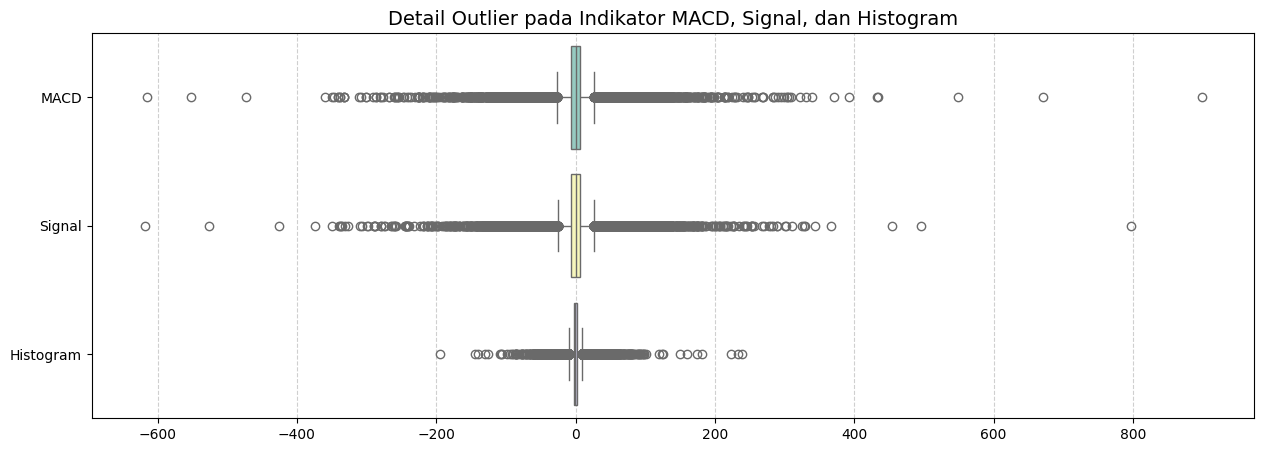

In [12]:
print("Visualisasi Distribusi Outlier (MACD Group):")

df_outlier_viz = df_from_hdfs.select("MACD", "Signal", "Histogram") \
                             .sample(False, 0.01) \
                             .toPandas()

plt.figure(figsize=(15, 5))
sns.boxplot(data=df_outlier_viz, palette="Set3", orient="h")
plt.title('Detail Outlier pada Indikator MACD, Signal, dan Histogram', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Tahapan ini bertujuan untuk mengidentiifikasi data anomali untuk memastikan objektivitas analisis.

**c. Untuk menjamin kualitas data gunakan Preprosesing data: casting tipe,
handling missing value, dll**

In [13]:
from pyspark.sql import Window
from pyspark.sql.functions import when, col, lead

print("Memulai Preprocessing: Perbaikan Tipe Data & Feature Engineering")

for column_name in df_from_hdfs.columns:
    if column_name != 'timestamp':
        df_from_hdfs = df_from_hdfs.withColumn(column_name, col(column_name).cast("double"))

# Pembuatan target (Harga 1 Menit Kedepan)
windowSpec = Window.orderBy("timestamp")
df_with_target = df_from_hdfs.withColumn("target_close", lead("close", 1).over(windowSpec))

# Menghapus baris terakhir karena tidak punya target (null)
df_ready = df_with_target.na.drop(subset=["target_close"])

print("Kolom Target 'target_close' (1 Menit Kedepan) Berhasil Dibuat")

# Meredam nilai ekstrem (Winsorization)
df_cleaned = df_ready.withColumn("MACD_clean",
    when(col("MACD") > 26.21, 26.21)
    .when(col("MACD") < -27.89, -27.89)
    .otherwise(col("MACD"))) \
    .withColumn("volume_clean",
    when(col("volume") > 100.96, 100.96)
    .when(col("volume") < -45.51, -45.51)
    .otherwise(col("volume")))

print("Winsorization selesai: Outlier pada MACD dan Volume telah diredam")

path_save_hdfs = "hdfs://localhost:9000/user/bigdata/btc_cleaned.parquet"
df_cleaned.write.mode("overwrite").parquet(path_save_hdfs)

print(f"Data Berhasil Disimpan di HDFS: {path_save_hdfs}")

print("\n" + "="*50)
print("STRUKTUR DATA CLEANED:")
print("="*50)

df_cleaned.printSchema()
df_cleaned.select("timestamp", "close", "target_close", "MACD_clean", "volume_clean").show(5)

df_cleaned.createOrReplaceTempView("btc_cleaned_table")

print(f"Total Baris Akhir: {df_cleaned.count():,}")
print(f"Variabel 'df_cleaned' siap digunakan")

Memulai Preprocessing: Perbaikan Tipe Data & Feature Engineering
Kolom Target 'target_close' (1 Menit Kedepan) Berhasil Dibuat
Winsorization selesai: Outlier pada MACD dan Volume telah diredam
Data Berhasil Disimpan di HDFS: hdfs://localhost:9000/user/bigdata/btc_cleaned.parquet

STRUKTUR DATA CLEANED:
root
 |-- timestamp: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- MA_20: double (nullable = true)
 |-- MA_50: double (nullable = true)
 |-- MA_200: double (nullable = true)
 |-- RSI: double (nullable = true)
 |-- %K: double (nullable = true)
 |-- %D: double (nullable = true)
 |-- ADX: double (nullable = true)
 |-- ATR: double (nullable = true)
 |-- Trendline: double (nullable = true)
 |-- MACD: double (nullable = true)
 |-- BL_Upper: double (nullable = true)
 |-- BL_Lower: double (nullable = true)
 |-- Signal: double (nu

Paada tahap ini adalah penyiapan data akhir yang siap diolah. Dengan proses ini, semua tipe data dijadikan numerik dan membuat kolom baru (target) yang berisi harga penutupan 1 menit kemudian. Selain itu, dilakukan teknik Winsorization untuk menangani outlier.

**d. Gunakan manipulasi data seperti query spark (Spark SQL, CTE, sub
query, sql hint, dll), agregasi nilai**

In [14]:
from pyspark.sql import Window
from pyspark.sql.functions import lead

df_cleaned.createOrReplaceTempView("btc_data")

print(f"Data df_cleaned siap dianalisis. Total: {df_cleaned.count():,}")
print("Menjalankan 6 Manipulasi Data Spark SQL\n")

# WINDOW FUNCTION (Selisih Target & Moving Average)
query_1 = """
SELECT
    timestamp,
    close as harga_sekarang,
    target_close as harga_menit_depan,
    (target_close - close) as selisih_prediksi,
    AVG(close) OVER(ORDER BY timestamp ROWS BETWEEN 60 PRECEDING AND CURRENT ROW) as moving_avg_1hour
FROM btc_data
LIMIT 10
"""
print("1. Window Function (Analisis Selisih Target):")
spark.sql(query_1).show()

# CTE & MARKET REGIME (Bullish/Bearish)
query_2 = """
WITH TrendAnalysis AS (
    SELECT close, MA_20, MA_50,
           CASE WHEN MA_20 > MA_50 THEN 'Bullish' ELSE 'Bearish' END as market_regime
    FROM btc_data
)
SELECT market_regime,
       COUNT(*) as total_minutes,
       ROUND(AVG(close), 2) as avg_price
FROM TrendAnalysis
GROUP BY market_regime
"""
print("2. CTE (Market Regime Analysis):")
spark.sql(query_2).show()

# HIGH VOLUME DETECTION
query_3 = """
WITH Stats AS (SELECT AVG(volume) * 10 as threshold FROM btc_data)
SELECT b.timestamp, b.volume, b.close
FROM btc_data b, Stats s
WHERE b.volume > s.threshold
ORDER BY b.volume DESC
LIMIT 5
"""
print("3. High Volume Detection (10x Rata-rata):")
spark.sql(query_3).show()

# MONTHLY SUMMARY (Agregasi Bulanan)
query_4 = """
SELECT
    substr(timestamp, 1, 7) as periode,
    COUNT(*) as record_count,
    ROUND(MAX(high), 2) as max_high,
    ROUND(MIN(low), 2) as min_low
FROM btc_data
GROUP BY periode
ORDER BY periode DESC
"""
print("4. Periode Aggregation (Bulanan):")
spark.sql(query_4).show(12)

# DAILY VOLATILITY (Range Harga Harian)
query_5 = """
SELECT
    date(timestamp) as trade_date,
    ROUND(MAX(high) - MIN(low), 2) as range_volatility,
    ROUND(SUM(volume), 2) as total_volume_daily
FROM btc_data
GROUP BY trade_date
ORDER BY range_volatility DESC
LIMIT 5
"""
print("5. Daily Volatility Analysis:")
spark.sql(query_5).show()

# SET OPERATIONS (Deteksi ATH & ATL)
query_6 = """
(SELECT 'ATH (All Time High)' as status, timestamp, close FROM btc_data ORDER BY close DESC LIMIT 1)
UNION ALL
(SELECT 'ATL (All Time Low)' as status, timestamp, close FROM btc_data ORDER BY close ASC LIMIT 1)
"""
print("6. Set Operations (ATH & ATL Detection):")
spark.sql(query_6).show()

Data df_cleaned siap dianalisis. Total: 2,262,999
Menjalankan 6 Manipulasi Data Spark SQL

1. Window Function (Analisis Selisih Target):
+-------------------+--------------+-----------------+-------------------+------------------+
|          timestamp|harga_sekarang|harga_menit_depan|   selisih_prediksi|  moving_avg_1hour|
+-------------------+--------------+-----------------+-------------------+------------------+
|2017-08-18 01:19:00|       4142.67|          4172.81| 30.140000000000327|           4142.67|
|2017-08-18 01:20:00|       4172.81|          4196.73| 23.919999999999163|           4157.74|
|2017-08-18 01:21:00|       4196.73|          4164.28| -32.44999999999982| 4170.736666666667|
|2017-08-18 01:22:00|       4164.28|          4196.73|  32.44999999999982|4169.1224999999995|
|2017-08-18 01:23:00|       4196.73|          4202.75|  6.020000000000437| 4174.643999999999|
|2017-08-18 01:24:00|       4202.75|          4202.75|                0.0| 4179.328333333333|
|2017-08-18 01:25

Intinya, bagian ini adalah tahap bedah data menggunakan perintah SQL untuk menggali informasi penting dari pergerakan harga Bitcoin. Melalui proses ini, sistem dapat mendeteksi kondisi pasar (naik atau turun), memantau lonjakan transaksi yang sangat besar, hingga merangkum fluktuasi harga setiap bulan secara otomatis. Selain itu, langkah ini digunakan untuk menentukan titik harga tertinggi (ATH) dan terendah (ATL) sepanjang masa. Semua analisis ini dilakukan guna memastikan data memiliki pola yang konsisten dan masuk akal sebelum dilanjutkan ke tahap pelatihan model.

**e. Lakukan operasi partisi menggunakan RDD seperti map, flatmap,
partitioner, byKey (reducebykey, groupbykey,
combinebykey/aggregatebykey)**

In [15]:
from pyspark.sql import Window
from pyspark.sql.functions import lead

base_rdd = df_cleaned.rdd.cache()

# MAP & FLATMAP
# Mengambil Jam dari string timestamp (misal: "2024-01-01 14:00:00" -> "14")
map_rdd = base_rdd.map(lambda r: (str(r['timestamp'])[11:13], float(r['volume'])))

def expand_info(row):
    return [f"T:{row['timestamp']}", f"P:{row['close']}"]
flatmap_rdd = base_rdd.flatMap(expand_info)

print(f"\n1. [FlatMap] Tokenisasi Data (Sampel 2 Elemen pertama):")
print(f"   {flatmap_rdd.take(2)}")

# PARTITIONER
# Mengatur ulang data ke dalam 8 partisi agar pemrosesan paralel maksimal
partitioned_rdd = map_rdd.partitionBy(8)
print(f"\n2. [Partitioner] Optimasi Distribusi:")
print(f"   Data didistribusikan ke dalam {partitioned_rdd.getNumPartitions()} partisi.")

# REDUCEBYKEY, GROUPBYKEY, & COMBINEBYKEY
reduce_res  = partitioned_rdd.reduceByKey(lambda a, b: a + b)
group_res   = partitioned_rdd.groupByKey().mapValues(lambda x: len(list(x)))
combine_res = partitioned_rdd.combineByKey(
    (lambda v: (v, 1)),
    (lambda acc, v: (acc[0] + v, acc[1] + 1)),
    (lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1]))
)

# AGGREGATEBYKEY (Mencari Max Price per Jam)
price_vol_rdd = base_rdd.map(lambda r: (str(r['timestamp'])[11:13], (float(r['volume']), float(r['close']))))
zero_val = (0.0, 0.0)

agg_res = price_vol_rdd.aggregateByKey(
    zero_val,
    (lambda acc, v: (acc[0] + v[0], max(acc[1], v[1]))),
    (lambda acc1, acc2: (acc1[0] + acc2[0], max(acc1[1], acc2[1])))
)

final_results = agg_res.sortBy(lambda x: x[0]).collect()

print(f"\n3. [Agregasi Lanjutan] Ringkasan Pasar Berdasarkan Jam (UTC):")
print("-" * 75)
print(f"{'Jam':<6} | {'Total Volume Transaksi':<25} | {'Harga Tertinggi (USD)':<20}")
print("-" * 75)

for jam, data in final_results:
    total_vol, max_price = data
    if jam and jam.strip():
        print(f"{jam:<6} | {total_vol:<25,.2f} | {max_price:<20,.2f}")

print("-" * 75)
print(f"Total Data Sukses Diproses: {base_rdd.count():,} baris")
print("="*75)


1. [FlatMap] Tokenisasi Data (Sampel 2 Elemen pertama):
   ['T:2017-08-18 01:19:00', 'P:4142.67']

2. [Partitioner] Optimasi Distribusi:
   Data didistribusikan ke dalam 8 partisi.

3. [Agregasi Lanjutan] Ringkasan Pasar Berdasarkan Jam (UTC):
---------------------------------------------------------------------------
Jam    | Total Volume Transaksi    | Harga Tertinggi (USD)
---------------------------------------------------------------------------
00     | 85,084.27                 | 106,232.58          
01     | 2,427,191.81              | 106,279.14          
02     | 5,476,608.40              | 106,572.01          
03     | 6,071,456.36              | 106,948.01          
04     | 5,903,577.26              | 106,845.59          
05     | 5,962,018.37              | 106,817.68          
06     | 6,396,727.76              | 109,194.17          
07     | 6,999,837.27              | 109,150.00          
08     | 7,575,471.13              | 108,320.01          
09     | 7,329,856.27 

Pada bagian ini adalah tahap optimasi dan pengolahan data tingkat rendah untuk mempercepat proses hitung dalam skala besar. Melalui teknik ini, data dipecah menjadi bagian-alih (partisi) yang lebih kecil agar mesin bisa bekerja secara paralel dan lebih efisien. Sistem secara otomatis merangkum pergerakan pasar berdasarkan jam, seperti menghitung total volume transaksi dan memantau harga tertinggi yang pernah dicapai. Langkah ini memastikan bahwa jutaan baris data dapat diringkas menjadi informasi yang rapi dan cepat tanpa membebani memori komputer.

# **Dari data yang telah bersih lakukan permodelan algoritma berbasis ML framework (MLLib) sesuai dengan tugas dataset yang anda miliki (supervised / unsupervised), komparasi minimal 2 algoritma sesuai dengan tugas project anda**

**Analisis Korelasi dan Seleksi Fitur**

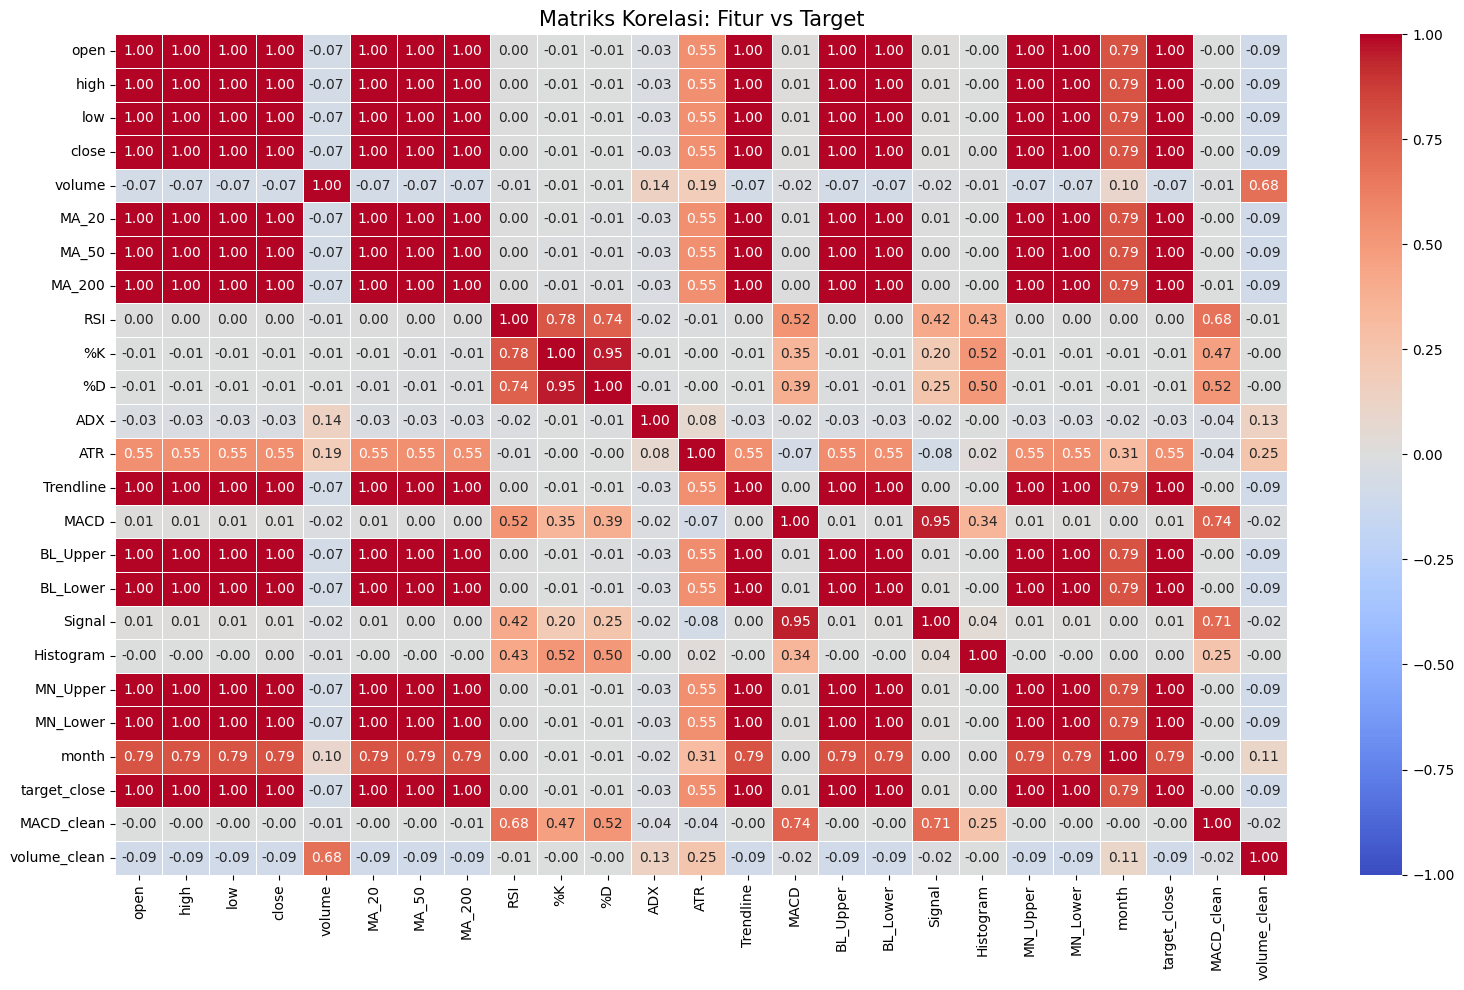


FITUR YANG LOLOS SELEKSI (Korelasi >= 0.5):
1. open            | Nilai Korelasi: 1.0000
2. high            | Nilai Korelasi: 1.0000
3. low             | Nilai Korelasi: 1.0000
4. close           | Nilai Korelasi: 1.0000
5. MA_20           | Nilai Korelasi: 1.0000
6. MA_50           | Nilai Korelasi: 1.0000
7. MA_200          | Nilai Korelasi: 0.9999
8. ATR             | Nilai Korelasi: 0.5524
9. Trendline       | Nilai Korelasi: 0.9999
10. BL_Upper        | Nilai Korelasi: 1.0000
11. BL_Lower        | Nilai Korelasi: 1.0000
12. MN_Upper        | Nilai Korelasi: 1.0000
13. MN_Lower        | Nilai Korelasi: 1.0000
14. month           | Nilai Korelasi: 0.7946
Total fitur terpilih: 14
Data siap masuk ke algoritma MLlib dengan 2,262,999 baris.


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

numeric_cols = [c for c in df_cleaned.columns if c != 'timestamp']

assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features_corr", handleInvalid="skip")
df_vector = assembler.transform(df_cleaned).select("features_corr")

matrix = Correlation.corr(df_vector, "features_corr").collect()[0][0]
corr_matrix = matrix.toArray()

df_corr = pd.DataFrame(corr_matrix, index=numeric_cols, columns=numeric_cols)

plt.figure(figsize=(16, 10))
sns.heatmap(df_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0,
            linewidths=0.5)

plt.title('Matriks Korelasi: Fitur vs Target', fontsize=15)
plt.tight_layout()
plt.show()

# OTOMATISASI SELEKSI FITUR (THRESHOLD >= 0.5)
target_corr = df_corr['target_close'].abs()

# Filter fitur (Korelasi >= 0.5)
selected_features = target_corr[target_corr >= 0.5].index.tolist()
if 'target_close' in selected_features:
    selected_features.remove('target_close')

print("\n" + "="*60)
print(f"FITUR YANG LOLOS SELEKSI (Korelasi >= 0.5):")
print("="*60)
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature:<15} | Nilai Korelasi: {target_corr[feature]:.4f}")

# 3. Buat DataFrame Akhir untuk Pemodelan (df_model)
# Mengambil fitur terbaik dari df_cleaned
df_model = df_cleaned.select(selected_features + ['target_close'])

print(f"Total fitur terpilih: {len(selected_features)}")
print(f"Data siap masuk ke algoritma MLlib dengan {df_model.count():,} baris.")

Pada bagian ini digunakan untuk menganalisa dari seluruh korelasi variabel ke variabel target dan disinilah seleksi fitur dilakukan. Jika korelasinya >=0,5 maka akan dipakai jika dibawah itu diabaikan.

**Membangun 2 Model (LINEAR VS RIDGE)**

In [17]:
import time
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler

print("Menyiapkan Fitur dan Standarisasi Data")

# Menggunakan fitur yang sudah terpilih dari df_model
assembler = VectorAssembler(inputCols=selected_features, outputCol="raw_features")
df_assembled = assembler.transform(df_model)

# Standarisasi fitur agar skala data seragam
scaler = StandardScaler(inputCol="raw_features", outputCol="features", withStd=True, withMean=True)
scaler_model = scaler.fit(df_assembled)
df_final_ml = scaler_model.transform(df_assembled).select("features", "target_close")

# Split data: 80% Training, 20% Testing
train_data, test_data = df_final_ml.randomSplit([0.8, 0.2], seed=42)
train_count = train_data.count()

print(f"Data siap, training pada {train_count:,} data.")

# --- MODEL 1: LINEAR REGRESSION ---
print("\nTraining Linear Regression")
start_lr = time.time()
lr = LinearRegression(featuresCol="features", labelCol="target_close", elasticNetParam=0, regParam=0)
lr_model = lr.fit(train_data)
print(f"Linear Regression Selesai ({time.time() - start_lr:.2f} detik)")

# --- MODEL 2: RIDGE REGRESSION ---
print("Training Ridge Regression")
start_ridge = time.time()
ridge = LinearRegression(featuresCol="features", labelCol="target_close", elasticNetParam=0, regParam=0.1)
ridge_model = ridge.fit(train_data)
print(f"Ridge Regression Selesai ({time.time() - start_ridge:.2f} detik)")

Menyiapkan Fitur dan Standarisasi Data
Data siap, training pada 1,810,212 data.

Training Linear Regression
Linear Regression Selesai (103.55 detik)
Training Ridge Regression
Ridge Regression Selesai (102.63 detik)


Proses membagi data menjadi data train dan test sebesar 80:20. Model yang digunakan adalah Linear Regression dan  Ridge Regression.

**Evaluasi**

In [18]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, abs as spark_abs

def get_full_metrics(model, data, name):
    # Melakukan prediksi pada data testing
    predictions = model.transform(data)

    evaluator = RegressionEvaluator(labelCol="target_close", predictionCol="prediction")

    rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
    mse  = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
    mae  = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
    r2   = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

    mape = predictions.withColumn("err", spark_abs(col("target_close") - col("prediction")) / col("target_close")) \
               .agg({"err": "avg"}).collect()[0][0] * 100

    return [name, mse, rmse, mae, r2, mape]

res_lr = get_full_metrics(lr_model, test_data, "Linear Regression")
res_ridge = get_full_metrics(ridge_model, test_data, "Ridge Regression")

print("="*90)
print(f"{'Metrik':<25} | {'Linear Regression':<25} | {'Ridge Regression':<25}")
print("-" * 90)
labels = ["MSE", "RMSE", "MAE", "R² Score", "MAPE (%)"]
for i in range(len(labels)):
    print(f"{labels[i]:<25} | {res_lr[i+1]:<25.4f} | {res_ridge[i+1]:<25.4f}")
print("="*90)

Metrik                    | Linear Regression         | Ridge Regression         
------------------------------------------------------------------------------------------
MSE                       | 1862.0187                 | 1839.9247                
RMSE                      | 43.1511                   | 42.8943                  
MAE                       | 17.5530                   | 17.1896                  
R² Score                  | 1.0000                    | 1.0000                   
MAPE (%)                  | 0.0630                    | 0.0616                   


Hasil evaluasi dari dua model terlihat pada tabel diatas, secara keseluruhan model Ridge Regression memiliki hasil yang lebih bagus. Model Ridge Regression masuk ke tahap hyperparameter tuning.

# **Lakukan hyperparameter tuning terhadap best model dari soal ke 4.  Interpretasikan hasil yang ada dengan baik**

In [19]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

print("Memulai Hyperparameter Tuning untuk Ridge Regression")

ridge_base = LinearRegression(featuresCol="features", labelCol="target_close", elasticNetParam=0)

paramGrid = ParamGridBuilder() \
    .addGrid(ridge_base.regParam, [0.001, 0.01, 0.1, 1.0, 10.0]) \
    .build()

evaluator = RegressionEvaluator(labelCol="target_close", predictionCol="prediction", metricName="rmse")

# Melakukan Cross Validation dengan 3 lipatan (folds)
cv = CrossValidator(estimator=ridge_base,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=3)

start_tuning = time.time()
cv_model = cv.fit(train_data)
ridge_best_model = cv_model.bestModel
duration_tuning = time.time() - start_tuning

print(f"Tuning Selesai ({duration_tuning:.2f} detik)")

# Menampilkan nilai regParam terbaik hasil pencarian
print(f"Nilai regParam Terbaik: {ridge_best_model._java_obj.getRegParam()}")

Memulai Hyperparameter Tuning untuk Ridge Regression
Tuning Selesai (428.68 detik)
Nilai regParam Terbaik: 0.001


Secara keseluruhan, tahapan ini merupakan proses pencarian parameter optimal untuk meningkatkan akurasi prediksi model. Melalui teknik Cross-Validation, sistem melakukan simulasi pengujian berulang kali dengan mencoba berbagai nilai pengaturan pada variabel regParam.

**Evaluasi**

In [20]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, abs as spark_abs

def get_metrics_tuned(model, data, name):
    # Melakukan prediksi menggunakan model terbaik hasil tuning
    pred = model.transform(data)

    # Inisialisasi evaluator untuk masing-masing metrik
    eval_rmse = RegressionEvaluator(labelCol="target_close", metricName="rmse")
    eval_mse  = RegressionEvaluator(labelCol="target_close", metricName="mse")
    eval_mae  = RegressionEvaluator(labelCol="target_close", metricName="mae")
    eval_r2   = RegressionEvaluator(labelCol="target_close", metricName="r2")

    # Menghitung nilai metrik
    rmse = eval_rmse.evaluate(pred)
    mse  = eval_mse.evaluate(pred)
    mae  = eval_mae.evaluate(pred)
    r2   = eval_r2.evaluate(pred)

    # Menghitung MAPE (Mean Absolute Percentage Error)
    mape = pred.withColumn("err", spark_abs(col("target_close") - col("prediction")) / col("target_close")) \
               .agg({"err": "avg"}).collect()[0][0] * 100

    return [name, mse, rmse, mae, r2, mape]

# Mengambil metrik dari Ridge lama dan Ridge hasil tuning
res_ridge_old = get_full_metrics(ridge_model, test_data, "Ridge (Lama - 0.1)")
res_ridge_tuned = get_metrics_tuned(ridge_best_model, test_data, "Ridge (Tuned)")

# Menampilkan tabel perbandingan akhir
print("="*90)
print(f"{'HASIL PERBANDINGAN SETELAH TUNING':^90}")
print("="*90)
print(f"{'Metrik':<25} | {'Ridge (Lama)':<25} | {'Ridge (Tuned)':<25}")
print("-" * 90)

labels = ["MSE", "RMSE", "MAE", "R² Score", "MAPE (%)"]
for i in range(len(labels)):
    print(f"{labels[i]:<25} | {res_ridge_old[i+1]:<25.4f} | {res_ridge_tuned[i+1]:<25.4f}")
print("="*90)

                            HASIL PERBANDINGAN SETELAH TUNING                             
Metrik                    | Ridge (Lama)              | Ridge (Tuned)            
------------------------------------------------------------------------------------------
MSE                       | 1839.9247                 | 1593.5381                
RMSE                      | 42.8943                   | 39.9191                  
MAE                       | 17.1896                   | 15.7601                  
R² Score                  | 1.0000                    | 1.0000                   
MAPE (%)                  | 0.0616                    | 0.0572                   


Hasilnya dapat dilihat pada tabel diatas, model yang baru memiliki akurasi yang tinggi. Hal ini menandakan proses hyperparameter tuning berhasil.

**Simpan Model**

In [21]:
import os
import shutil
from google.colab import files

local_model_path = "file:///content/model_btc_ridge_final"
local_scaler_path = "file:///content/scaler_btc_final"

try:
    print("Mengekspor model dari Spark ke Local Storage Colab")

    ridge_best_model.write().overwrite().save(local_model_path)

    scaler_model.write().overwrite().save(local_scaler_path)

    print("Ekspor model sukses.\n")

    print("Sedang mengompres folder menjadi file ZIP")

    zip_model_name = '/content/model_btc_ridge_offline'
    zip_scaler_name = '/content/scaler_btc_offline'

    shutil.make_archive(zip_model_name, 'zip', '/content/model_btc_ridge_final')
    shutil.make_archive(zip_scaler_name, 'zip', '/content/scaler_btc_final')

    print("Folder berhasil di-ZIP\n")

    print("Memulai proses download ke PC Anda")
    print("(Harap tunggu sampai muncul jendela save file di browser)")

    files.download(f"{zip_model_name}.zip")
    files.download(f"{zip_scaler_name}.zip")

    print("-" * 60)
    print("PROSES SELESAI!")
    print("-" * 60)

except Exception as e:
    print(f"\n[ERROR] Terjadi kendala: {e}")

Mengekspor model dari Spark ke Local Storage Colab
Ekspor model sukses.

Sedang mengompres folder menjadi file ZIP
Folder berhasil di-ZIP

Memulai proses download ke PC Anda
(Harap tunggu sampai muncul jendela save file di browser)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------------------------------------------------------
PROSES SELESAI!
------------------------------------------------------------


**Perbandingan Akurasi**

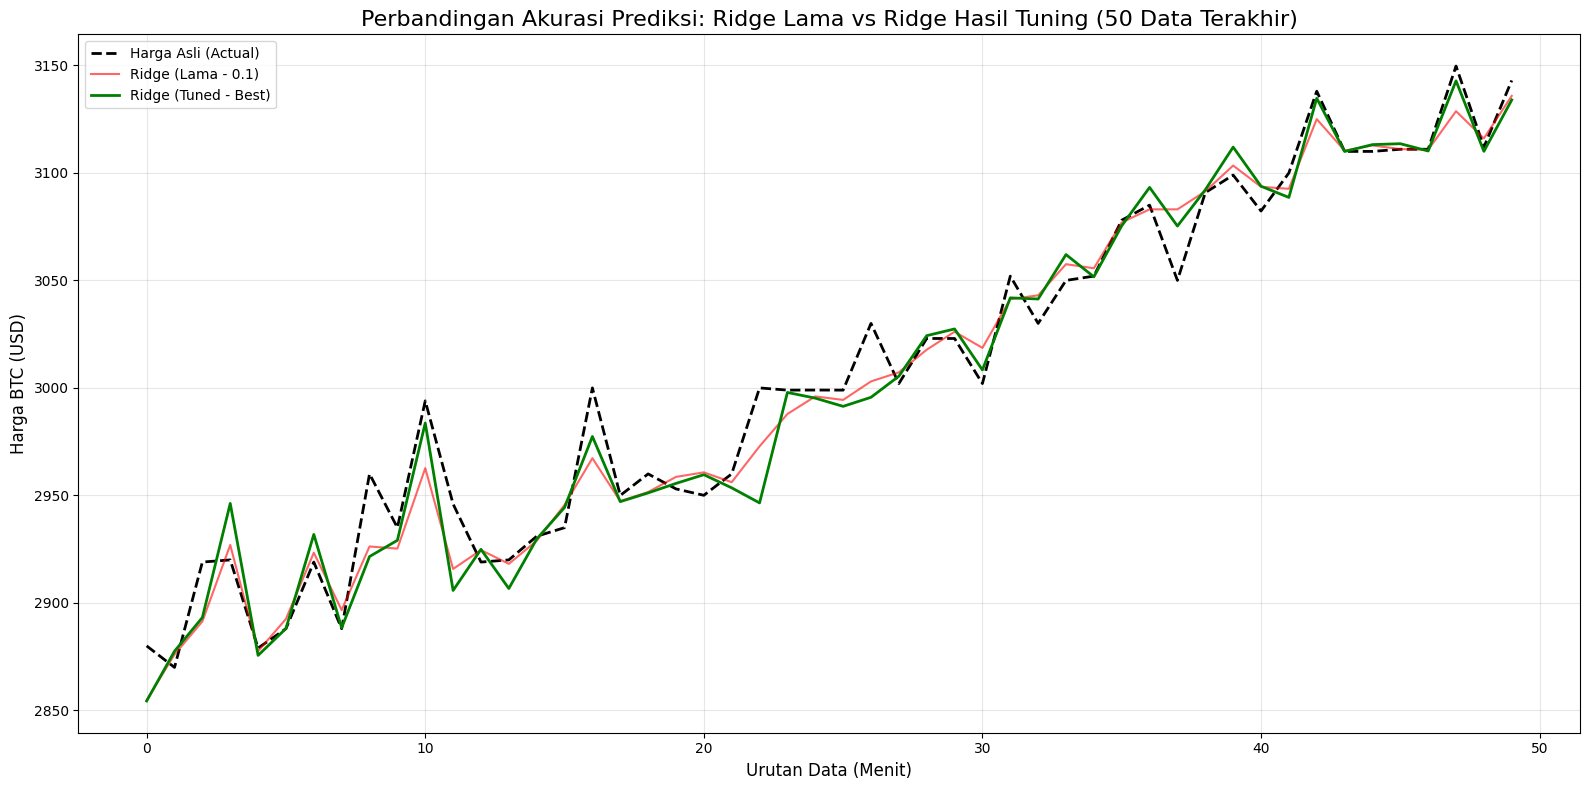

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

test_sample = test_data.limit(50)

pred_old = ridge_model.transform(test_sample)
pred_tuned = ridge_best_model.transform(test_sample)

df_plot_old = pred_old.select("target_close", "prediction").toPandas()
df_plot_tuned = pred_tuned.select("prediction").toPandas()

plt.figure(figsize=(16, 8))

plt.plot(df_plot_old.index, df_plot_old['target_close'],
         label='Harga Asli (Actual)', color='black', linewidth=2, linestyle='--')

plt.plot(df_plot_old.index, df_plot_old['prediction'],
         label='Ridge (Lama - 0.1)', color='red', alpha=0.6)

plt.plot(df_plot_old.index, df_plot_tuned['prediction'],
         label='Ridge (Tuned - Best)', color='green', linewidth=2)

plt.title('Perbandingan Akurasi Prediksi: Ridge Lama vs Ridge Hasil Tuning (50 Data Terakhir)', fontsize=16)
plt.xlabel('Urutan Data (Menit)', fontsize=12)
plt.ylabel('Harga BTC (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()